<a href="https://colab.research.google.com/github/subhobrata/Natural-Language-Processing-From-Scratch/blob/master/Text_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import string
from collections import Counter
from pprint import pprint
import gzip
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

In [0]:
text = """Mary had a little lamb, little lamb,
    little lamb. Mary had a little lamb
    whose fleece was white as snow.
    And everywhere that Mary went
    Mary went, Mary went. Everywhere
    that Mary went,
    The lamb was sure to go"""

In [0]:
def extract_words(text):
    temp = text.split() # Split the text on whitespace
    text_words = []

    for word in temp:
        # Remove any punctuation characters present in the beginning of the word
        while word[0] in string.punctuation:
            word = word[1:]

        # Remove any punctuation characters present in the end of the word
        while word[-1] in string.punctuation:
            word = word[:-1]

        # Append this word into our list of words.
        text_words.append(word.lower())
        
    return text_words

In [9]:
text_words = extract_words(text)
print(text_words)

['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb', 'mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow', 'and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went', 'everywhere', 'that', 'mary', 'went', 'the', 'lamb', 'was', 'sure', 'to', 'go']


In [0]:
word_dict = {}
word_list = []
vocabulary_size = 0
text_tokens = []

for word in text_words:
    # If we are seeing this word for the first time, create an id for it and added it to our word dictionary
    if word not in word_dict:
        word_dict[word] = vocabulary_size
        word_list.append(word)
        vocabulary_size += 1
    
    # add the token corresponding to the current word to the tokenized text.
    text_tokens.append(word_dict[word])

In [11]:
print("Word list:", word_list, "\n\n Word dictionary:")
pprint(word_dict)

Word list: ['mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow', 'and', 'everywhere', 'that', 'went', 'the', 'sure', 'to', 'go'] 

 Word dictionary:
{'a': 2,
 'and': 11,
 'as': 9,
 'everywhere': 12,
 'fleece': 6,
 'go': 18,
 'had': 1,
 'lamb': 4,
 'little': 3,
 'mary': 0,
 'snow': 10,
 'sure': 16,
 'that': 13,
 'the': 15,
 'to': 17,
 'was': 7,
 'went': 14,
 'white': 8,
 'whose': 5}


In [12]:
print(text_tokens)

[0, 1, 2, 3, 4, 3, 4, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 14, 0, 14, 0, 14, 12, 13, 0, 14, 15, 4, 7, 16, 17, 18]


In [0]:
def one_hot(word, word_dict):
    """
        Generate a one-hot encoded vector corresponding to *word*
    """
    
    vector = np.zeros(len(word_dict))
    vector[word_dict[word]] = 1
    
    return vector

In [14]:
fleece_hot = one_hot("fleece", word_dict)
print(fleece_hot)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print(word_dict["fleece"])
fleece_hot[6] == 1

6


True

In [16]:
text_vector1 = np.zeros(vocabulary_size)

for word in text_words:
    hot_word = one_hot(word, word_dict)
    text_vector1 += hot_word
    
print(text_vector1)

[6. 2. 2. 4. 5. 1. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 1.]


In [17]:
text_vector = np.zeros(vocabulary_size)

for word in text_words:
    text_vector[word_dict[word]] += 1
    
print(text_vector)

[6. 2. 2. 4. 5. 1. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 1.]


In [18]:
text_vector[word_dict["mary"]]

6.0

In [19]:
word_counts = Counter(text_words)
pprint(word_counts)

Counter({'mary': 6,
         'lamb': 5,
         'little': 4,
         'went': 4,
         'had': 2,
         'a': 2,
         'was': 2,
         'everywhere': 2,
         'that': 2,
         'whose': 1,
         'fleece': 1,
         'white': 1,
         'as': 1,
         'snow': 1,
         'and': 1,
         'the': 1,
         'sure': 1,
         'to': 1,
         'go': 1})


In [0]:
items = list(word_counts.items())

# Extract word dictionary and vector representation
word_dict2 = dict([[items[i][0], i] for i in range(len(items))])
text_vector2 = [items[i][1] for i in range(len(items))]

In [21]:
print("Text vector:", text_vector2, "\n\nWord dictionary:")
pprint(word_dict2)

Text vector: [6, 2, 2, 4, 5, 1, 1, 2, 1, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1] 

Word dictionary:
{'a': 2,
 'and': 11,
 'as': 9,
 'everywhere': 12,
 'fleece': 6,
 'go': 18,
 'had': 1,
 'lamb': 4,
 'little': 3,
 'mary': 0,
 'snow': 10,
 'sure': 16,
 'that': 13,
 'the': 15,
 'to': 17,
 'was': 7,
 'went': 14,
 'white': 8,
 'whose': 5}


In [0]:
for word in word_dict.keys():
    if text_vector[word_dict[word]] != text_vector2[word_dict2[word]]:
        print("Error!")

In [23]:
sorted(items, key=lambda x:x[1], reverse=True)

[('mary', 6),
 ('lamb', 5),
 ('little', 4),
 ('went', 4),
 ('had', 2),
 ('a', 2),
 ('was', 2),
 ('everywhere', 2),
 ('that', 2),
 ('whose', 1),
 ('fleece', 1),
 ('white', 1),
 ('as', 1),
 ('snow', 1),
 ('and', 1),
 ('the', 1),
 ('sure', 1),
 ('to', 1),
 ('go', 1)]

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = []

for line in gzip.open("/content/gdrive/My Drive/data/text8.gz", 'rt'):
    data.extend(line.strip().split())

In [27]:
counts = Counter(data)

sorted_counts = sorted(list(counts.items()), key=lambda x:x[1], reverse=True)

for word, count in sorted_counts[:10]:
    print(word, count)

the 1061396
of 593677
and 416629
one 411764
in 372201
a 325873
to 316376
zero 264975
nine 250430
two 192644


Text(0.5, 1.0, 'Word frequency distribution')

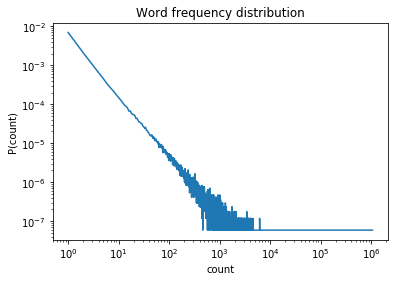

In [28]:
dist = Counter(counts.values())
dist = list(dist.items())
dist.sort(key=lambda x:x[0])
dist = np.array(dist)

norm = np.dot(dist.T[0], dist.T[1])

plt.loglog(dist.T[0], dist.T[1]/norm)
plt.xlabel("count")
plt.ylabel("P(count)")
plt.title("Word frequency distribution")

In [29]:
stopwords = set([word for word, count in sorted_counts[:100]])

clean_data = []

for word in data:
    if word not in stopwords:
        clean_data.append(word)

print("Original size:", len(data))
print("Clean size:", len(clean_data))
print("Reduction:", 1-len(clean_data)/len(data))

Original size: 17005207
Clean size: 9006229
Reduction: 0.470384041782026


In [0]:
corpus_text = text.split('.')
corpus_words = []

for document in corpus_text:
    doc_words = extract_words(document)
    corpus_words.append(doc_words)

In [31]:
pprint(corpus_words)

[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'],
 ['mary',
  'had',
  'a',
  'little',
  'lamb',
  'whose',
  'fleece',
  'was',
  'white',
  'as',
  'snow'],
 ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'],
 ['everywhere',
  'that',
  'mary',
  'went',
  'the',
  'lamb',
  'was',
  'sure',
  'to',
  'go']]


In [32]:
document_count = {}

for document in corpus_words:
    word_set = set(document)
    
    for word in word_set:
        document_count[word] = document_count.get(word, 0) + 1

pprint(document_count)

{'a': 2,
 'and': 1,
 'as': 1,
 'everywhere': 2,
 'fleece': 1,
 'go': 1,
 'had': 2,
 'lamb': 3,
 'little': 2,
 'mary': 4,
 'snow': 1,
 'sure': 1,
 'that': 2,
 'the': 1,
 'to': 1,
 'was': 2,
 'went': 2,
 'white': 1,
 'whose': 1}


In [0]:
def inv_doc_freq(corpus_words):
    number_docs = len(corpus_words)
    
    document_count = {}

    for document in corpus_words:
        word_set = set(document)

        for word in word_set:
            document_count[word] = document_count.get(word, 0) + 1
    
    IDF = {}
    
    for word in document_count:
        IDF[word] = np.log(number_docs/document_count[word])
        
    
    return IDF

In [34]:
IDF = inv_doc_freq(corpus_words)

pprint(IDF)

{'a': 0.6931471805599453,
 'and': 1.3862943611198906,
 'as': 1.3862943611198906,
 'everywhere': 0.6931471805599453,
 'fleece': 1.3862943611198906,
 'go': 1.3862943611198906,
 'had': 0.6931471805599453,
 'lamb': 0.28768207245178085,
 'little': 0.6931471805599453,
 'mary': 0.0,
 'snow': 1.3862943611198906,
 'sure': 1.3862943611198906,
 'that': 0.6931471805599453,
 'the': 1.3862943611198906,
 'to': 1.3862943611198906,
 'was': 0.6931471805599453,
 'went': 0.6931471805599453,
 'white': 1.3862943611198906,
 'whose': 1.3862943611198906}


In [0]:
def tf_idf(corpus_words):
    IDF = inv_doc_freq(corpus_words)
    
    TFIDF = []
    
    for document in corpus_words:
        TFIDF.append(Counter(document))
    
    for document in TFIDF:
        for word in document:
            document[word] = document[word]*IDF[word]
            
    return TFIDF

In [36]:
tf_idf(corpus_words)

[Counter({'a': 0.6931471805599453,
          'had': 0.6931471805599453,
          'lamb': 0.8630462173553426,
          'little': 2.0794415416798357,
          'mary': 0.0}),
 Counter({'a': 0.6931471805599453,
          'as': 1.3862943611198906,
          'fleece': 1.3862943611198906,
          'had': 0.6931471805599453,
          'lamb': 0.28768207245178085,
          'little': 0.6931471805599453,
          'mary': 0.0,
          'snow': 1.3862943611198906,
          'was': 0.6931471805599453,
          'white': 1.3862943611198906,
          'whose': 1.3862943611198906}),
 Counter({'and': 1.3862943611198906,
          'everywhere': 0.6931471805599453,
          'mary': 0.0,
          'that': 0.6931471805599453,
          'went': 2.0794415416798357}),
 Counter({'everywhere': 0.6931471805599453,
          'go': 1.3862943611198906,
          'lamb': 0.28768207245178085,
          'mary': 0.0,
          'sure': 1.3862943611198906,
          'that': 0.6931471805599453,
          'the': 1.3

In [0]:
V = set('aeiouy')
C = set('bcdfghjklmnpqrstvwxz')

In [0]:
def get_stem(suffix, word):
    """
        Extract the stem of a word
    """
    
    if word.lower().endswith(suffix.lower()): # Case insensitive comparison
        return word[:-len(suffix)]

    return None

In [0]:
def measure(orig_word):
    """
        Calculate the "measure" m of a word or stem, according to the Porter Stemmer algorthim
    """
    
    word = orig_word.lower()

    optV = False
    optC = False
    VC = False
    m = 0

    pos = 0

    # We can think of this implementation as a simple finite state machine
    # looks for sequences of vowels or consonants depending of the state
    # in which it's in, while keeping track of how many VC sequences it
    # has encountered.
    # The presence of the optional V and C portions is recorded in the
    # optV and optC booleans.
    
    # We're at the initial state.
    # gobble up all the optional consonants at the beginning of the word
    while pos < len(word) and word[pos] in C:
        pos += 1
        optC = True

    while pos < len(word):
        # Now we know that the next state must be a vowel
        while pos < len(word) and word[pos] in V:
            pos += 1
            optV = True

        # Followd by a consonant
        while pos < len(word) and word[pos] in C:
            pos += 1
            optV = False
        
        # If a consonant was found, then we matched VC
        # so we should increment m by one. Otherwise, 
        # optV remained true and we simply had a dangling
        # V sequence.
        if not optV:
            m += 1

    return m

In [40]:
word = "crepusculars"
print(measure(word))

4


In [0]:
def ends_with(char, stem):
    """
        Checks the ending of the word
    """
    return stem[-1] == char

def double_consonant(stem):
    """
        Checks the ending of a word for a double consonant
    """
    if len(stem) < 2:
        return False

    if stem[-1] in C and stem[-2] == stem[-1]:
        return True

    return False

def contains_vowel(stem):
    """
        Checks if a word contains a vowel or not
    """
    return len(set(stem) & V) > 0

In [0]:
def apply_rule(condition, suffix, replacement, word):
    """
        Apply Porter Stemmer rule.
        if "condition" is True replace "suffix" by "replacement" in "word"
    """
    
    stem = get_stem(suffix, word)

    if stem is not None and condition is True:
        # Remove the suffix
        word = stem

        # Add the replacement suffix, if any
        if replacement is not None:
            word += replacement

    return word

In [43]:
word = "plastered"
suffix = "ed"
stem = get_stem(suffix, word)
apply_rule(contains_vowel(stem), suffix, None, word)

'plaster'

In [44]:
word = "bled"
suffix = "ed"
stem = get_stem(suffix, word)
apply_rule(contains_vowel(stem), suffix, None, word)

'bled'

In [45]:
word = "adoption"
suffix = "ion"
stem = get_stem(suffix, word)
apply_rule(measure(stem) > 1 and (ends_with("s", stem) or ends_with("t", stem)), suffix, None, word)

'adopt'